# 회귀 (교통량 예측)

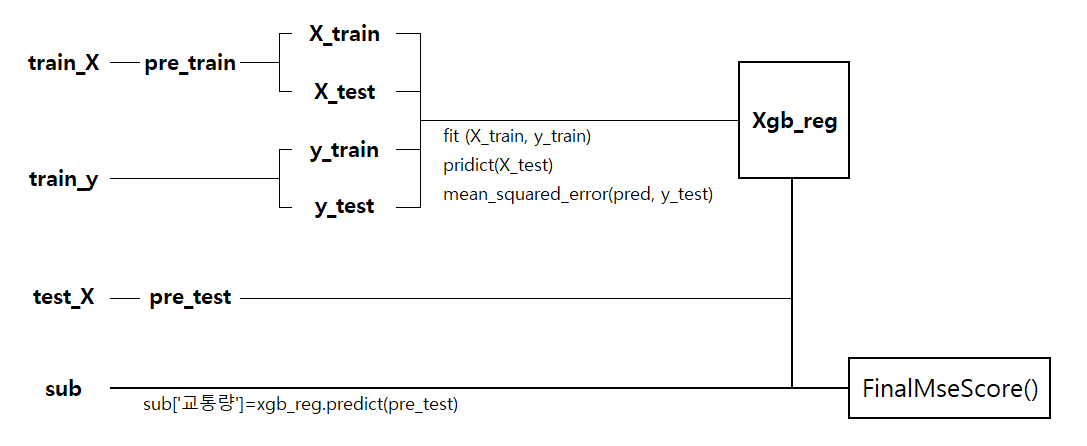

In [1]:
import pandas as pd
train_X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/Jeju_trainX.csv",encoding='euc-kr')
train_y= pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/Jeju_trainy.csv",encoding='euc-kr')
test_X= pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/Jeju_testX.csv",encoding='euc-kr')
sub= pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/subExample.csv",encoding='euc-kr')

## 데이터 조회하기 

In [2]:
train_X

,id,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속
0,0,2018-01-01,서귀포시,남원읍,291408.897,18744.131,219588.857,529741.884,53.000,40.571,2.350,0.0,3.325
1,1,2018-01-01,제주시,노형동,1215420.248,74964.858,445735.329,1736120.435,38.563,30.655,-2.300,0.0,1.100
2,2,2018-01-01,제주시,구좌읍,276220.023,17542.105,248104.122,541866.250,53.188,40.719,5.900,0.0,4.100
3,3,2018-01-01,제주시,용담1동,159129.790,9363.622,101939.586,270432.998,35.833,14.000,2.900,0.0,2.400
4,4,2018-01-01,제주시,건입동,174544.301,19772.091,191560.904,385877.295,33.600,43.400,0.800,0.0,2.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22443,22443,2020-04-30,제주시,삼도1동,219860.603,12830.104,125419.055,358109.763,36.375,23.500,16.900,0.0,2.800
22444,22444,2020-04-30,제주시,삼양동,525421.943,14188.214,116956.396,656566.553,30.429,18.429,15.967,0.0,2.800
22445,22445,2020-04-30,제주시,아라동,882968.955,45438.931,293991.894,1222399.781,40.333,67.259,14.933,0.0,3.900
22446,22446,2020-04-30,서귀포시,대정읍,434033.471,20288.082,184821.692,639143.245,54.000,50.722,17.600,0.0,4.167


In [3]:
train_y

,id,교통량
0,0,76.200
1,1,1291.184
2,2,0.000
3,3,610.167
4,4,393.400
...,...,...
22443,22443,0.000
22444,22444,9.000
22445,22445,1102.037
22446,22446,588.278


In [4]:
test_X

,id,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속
0,22448,2018-01-01,제주시,도두동,32249.987,3418.266,102709.092,138377.345,39.556,29.167,5.0,0.0,2.50
1,22449,2018-01-01,제주시,외도동,213500.997,10341.172,112692.789,336534.958,32.900,30.900,5.0,0.0,2.50
2,22450,2018-01-01,제주시,이도2동,1212382.218,96920.834,541194.481,1850497.533,29.538,35.692,2.9,0.0,2.40
3,22451,2018-01-01,제주시,일도1동,33991.653,6034.253,72155.919,112181.825,30.000,23.500,2.9,0.0,2.40
4,22452,2018-01-01,서귀포시,대천동,155036.925,9403.969,150882.409,315323.303,41.583,14.375,5.1,0.0,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9616,32064,2020-04-30,서귀포시,표선면,228260.005,16891.732,152832.449,397984.186,44.514,34.054,18.1,0.0,4.70
9617,32065,2020-04-30,제주시,한림읍,459959.064,26007.122,249700.419,735666.605,48.609,61.377,18.0,0.0,4.35
9618,32066,2020-04-30,제주시,도두동,28397.481,3144.895,84052.697,115595.073,41.053,29.421,20.3,0.0,3.00
9619,32067,2020-04-30,서귀포시,안덕면,348037.846,29106.286,251129.660,628273.792,46.595,49.189,17.6,0.0,3.50


In [5]:
sub

,id,교통량
0,22448,0
1,22449,0
2,22450,0
3,22451,0
4,22452,0
...,...,...
9616,32064,0
9617,32065,0
9618,32066,0
9619,32067,0


In [6]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22448 entries, 0 to 22447
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        22448 non-null  int64  
 1   일자        22448 non-null  object 
 2   시도명       22448 non-null  object 
 3   읍면동명      22448 non-null  object 
 4   거주인구      22448 non-null  float64
 5   근무인구      22448 non-null  float64
 6   방문인구      22448 non-null  float64
 7   총 유동인구    22448 non-null  float64
 8   평균 속도     22448 non-null  float64
 9   평균 소요 시간  22448 non-null  float64
 10  평균 기온     22448 non-null  float64
 11  일강수량      22448 non-null  float64
 12  평균 풍속     22448 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 2.2+ MB


In [7]:
train_X.isnull().sum()

id          0
일자          0
시도명         0
읍면동명        0
거주인구        0
근무인구        0
방문인구        0
총 유동인구      0
평균 속도       0
평균 소요 시간    0
평균 기온       0
일강수량        0
평균 풍속       0
dtype: int64

In [8]:
train_X.describe()

,id,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속
count,22448.000000,2.244800e+04,22448.000000,22448.000000,2.244800e+04,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000
mean,11223.500000,3.175557e+05,35805.028052,196133.748259,5.494945e+05,41.101625,37.221661,13.534623,7.401781,2.738243
std,6480.323757,2.981494e+05,40815.683983,140600.598737,4.611679e+05,8.708300,12.974543,7.749613,28.853829,1.468865
min,0.000000,1.032726e+04,1172.448000,10788.381000,2.228809e+04,23.545000,12.667000,-11.600000,0.000000,0.000000
25%,5611.750000,9.470432e+04,12221.819500,100005.044750,2.228364e+05,34.269000,27.889000,7.600000,0.000000,1.750000
50%,11223.500000,2.219279e+05,21765.337000,153158.832500,3.894584e+05,39.651500,34.500000,13.300000,0.000000,2.400000
75%,16835.250000,4.100979e+05,40316.875750,235928.067500,6.412934e+05,49.101250,46.191000,19.733000,1.500000,3.400000
max,22447.000000,1.353561e+06,272224.930000,786387.113000,2.079278e+06,95.000000,135.400000,30.400000,583.500000,17.700000


In [9]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22448 entries, 0 to 22447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      22448 non-null  int64  
 1   교통량     22448 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 350.9 KB


In [10]:
train_y.isnull().sum()

id     0
교통량    0
dtype: int64

In [11]:
train_y.describe()

,id,교통량
count,22448.000000,22448.000000
mean,11223.500000,374.652433
std,6480.323757,532.709650
min,0.000000,0.000000
25%,5611.750000,0.000000
50%,11223.500000,42.824500
75%,16835.250000,640.584500
max,22447.000000,2301.500000


## 데이터 전처리 

### LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_X['읍면동명'] )
train_X['읍면동명']  = le.transform(train_X['읍면동명'])
test_X['읍면동명']  = le.transform(test_X['읍면동명'])

train_X['시도명'] = train_X['시도명'].map(lambda x: 1 if x=='서귀포시' else 0) 
test_X['시도명'] = test_X['시도명'].map(lambda x: 1 if x=='서귀포시' else 0) 
train_X[['시도명', '읍면동명']].head(10)

,시도명,읍면동명
0,1,2
1,0,3
2,0,1
3,0,24
4,0,0
5,0,25
6,1,40
7,1,36
8,0,26
9,1,35


### 날짜 데이터 처리하기 

In [13]:
def dataPreprocessing(df2):
    df=df2.copy()
    df['일자']=pd.to_datetime(df['일자'])
    df['년도']=df['일자'].dt.year
    df['월']=df['일자'].dt.month
    df['일']=df['일자'].dt.day
    df['weekend']=df['일자'].dt.weekday
    return df

pre_train=dataPreprocessing(train_X).drop(['일자', 'id'], axis=1)
pre_test=dataPreprocessing(test_X).drop(['일자', 'id'], axis=1)
pre_train.head(3)

,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속,년도,월,일,weekend
0,1,2,291408.897,18744.131,219588.857,529741.884,53.000,40.571,2.35,0.0,3.325,2018,1,1,0
1,0,3,1215420.248,74964.858,445735.329,1736120.435,38.563,30.655,-2.30,0.0,1.100,2018,1,1,0
2,0,1,276220.023,17542.105,248104.122,541866.250,53.188,40.719,5.90,0.0,4.100,2018,1,1,0


### 파생변수 생성 

In [14]:
def make_variance(df2):
    df=df2.copy()
    df['방문인구비율']=df['방문인구']/df['총 유동인구']
    df['거주인구비율']=df['거주인구']/df['총 유동인구']
    df['관광지']=df['방문인구비율'].apply(lambda x: 1 if x>0.6 else 0)
    df['거주지']=df['방문인구비율'].apply(lambda x: 1 if x>0.6 else 0)
    df.drop(['방문인구비율', '거주인구비율'], axis=1, inplace=True)
    return df

pre_train=make_variance(pre_train)
pre_test=make_variance(pre_test)
pre_train.head(3)

,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속,년도,월,일,weekend,관광지,거주지
0,1,2,291408.897,18744.131,219588.857,529741.884,53.000,40.571,2.35,0.0,3.325,2018,1,1,0,0,0
1,0,3,1215420.248,74964.858,445735.329,1736120.435,38.563,30.655,-2.30,0.0,1.100,2018,1,1,0,0,0
2,0,1,276220.023,17542.105,248104.122,541866.250,53.188,40.719,5.90,0.0,4.100,2018,1,1,0,0,0


### 데이터 정규화 

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
def pre2(df, sc=None):
    df2=df.copy()
    if sc==None:
        sc=StandardScaler()
        sc.fit(df2[['거주인구', '근무인구', '방문인구', '총 유동인구']])
    df2[['거주인구', '근무인구', '방문인구', '총 유동인구']]=sc.transform(df2[['거주인구', '근무인구', '방문인구', '총 유동인구']])
    return df2, sc

pre_train,sc1=pre2(pre_train)
pre_test,sc2=pre2(pre_test)
pre_train.head(3)

,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속,년도,월,일,weekend,관광지,거주지
0,1,2,-0.087699,-0.418008,0.166825,-0.042833,53.000,40.571,2.35,0.0,3.325,2018,1,1,0,0,0
1,0,3,3.011526,0.959452,1.775292,2.573146,38.563,30.655,-2.30,0.0,1.100,2018,1,1,0,0,0
2,0,1,-0.138644,-0.447459,0.369639,-0.016541,53.188,40.719,5.90,0.0,4.100,2018,1,1,0,0,0


## 데이터 분리하기

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(pre_train, train_y['교통량'], test_size=0.15, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #랜덤포레스트회귀, GBM회귀
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
xgb_reg=XGBRegressor(n_estimators=1000)

dt_reg.fit(X_train,y_train)
rf_reg.fit(X_train,y_train)
gb_reg.fit(X_train,y_train)
xgb_reg.fit(X_train,y_train)

y_preds_dt=dt_reg.predict(X_test)
y_preds_rf=rf_reg.predict(X_test)
y_preds_gb=gb_reg.predict(X_test)
y_preds_xgb=xgb_reg.predict(X_test)

mse_dt=mean_squared_error(y_test, y_preds_dt)
mse_rf=mean_squared_error(y_test, y_preds_rf)
mse_gb=mean_squared_error(y_test, y_preds_gb)
mse_xgb=mean_squared_error(y_test, y_preds_xgb)

In [18]:
print('dt: {0}, rf: {1}, gb: {2}, xgb: {3}'.format(mse_dt, mse_rf, mse_gb, mse_xgb))

dt: 78533.31528640221, rf: 7915.143980030101, gb: 10118.460523123465, xgb: 7581.293279662558


## 결과 예측하기 

In [19]:
sub['교통량']=xgb_reg.predict(pre_test)
sub.head(10)

,id,교통량
0,22448,1328.477661
1,22449,1089.673828
2,22450,140.837875
3,22451,-10.952581
4,22452,-105.532722
5,22453,-17.299345
6,22454,699.857605
7,22455,109.843933
8,22456,22.717503
9,22457,526.056091


In [20]:
sub.to_csv('./submission.csv')

### 결과 평가하기 

In [21]:
def FinalMseScore():
    import pandas as pd
    y_true = pd.read_csv("https://raw.githubusercontent.com/Datamanim/jeju/main/Jeju_testy.csv",encoding='euc-kr')
    sub = pd.read_csv('./submission.csv',index_col='id')
    pred = sub.iloc[:,-1].values
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(pred,y_true['교통량'])    
    print('submission mse score : ',mse)
    return mse

In [22]:
final_mse=FinalMseScore()

submission mse score :  6688.687219987423
